### Problem 1 - EU Cities Temperatures Dataset

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

#### Preprocessing/Analysis

In [4]:
# reading the data from the csv file
data = pd.read_csv("EuCitiesTemperatures.csv")
print(data)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no       NaN   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes       NaN   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3          NaN         6.91

In [5]:
# loading the data into a dataframe
data = pd.DataFrame(data)
print(data)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no       NaN   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes       NaN   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3          NaN         6.91

#### Part 1

In [7]:
# finding the avg latitude values and filling in the missing ones
data['latitude'] = data['latitude'].fillna(data.groupby('country')['latitude'].transform(lambda x: round(x.mean(), 2)))
print(data['latitude'])

0      41.12
1      42.50
2      47.85
3      47.08
4      48.32
       ...  
208    55.95
209    50.70
210    53.55
211    55.87
212    51.63
Name: latitude, Length: 213, dtype: float64


In [8]:
# finding the avg longitude values and filling in the missing values
data['longitude'] = data['longitude'].fillna(data.groupby('country')['longitude'].transform(lambda x: round(x.mean(), 2)))
print(data['longitude'])

0      20.08
1       1.52
2      11.41
3      14.02
4      14.29
       ...  
208    -2.94
209    -3.53
210    -4.23
211    -4.25
212    -3.95
Name: longitude, Length: 213, dtype: float64


#### Part 2

In [9]:
# getting the subset of cities and corresponding country
subset = data[(data['latitude'].between(40, 60)) & (data['longitude'].between(15, 30))][['city', 'country']]
print(subset)

           city  country
0       Elbasan  Albania
6        Vienna  Austria
7         Minsk  Belarus
8         Orsha  Belarus
9         Pinsk  Belarus
..          ...      ...
165       Bursa   Turkey
169      Edirne   Turkey
183    Tekirdag   Turkey
186  Chernivtsi  Ukraine
193       Rivne  Ukraine

[63 rows x 2 columns]


In [10]:
# counting occurrences of each country and getting the countries with the max cities
country_counts = subset['country'].value_counts()
max_countries = country_counts[country_counts == country_counts.max()]
print(max_countries)

country
Romania    9
Poland     9
Name: count, dtype: int64


#### Part 3

In [11]:
# getting the avg temperature based on the EU and coastline status 
avg_temps = data.groupby(['EU', 'coastline'])['temperature'].transform('mean')
print(avg_temps)

0       9.732000
1       7.481538
2       7.538333
3       7.538333
4       7.538333
         ...    
208    10.314494
209    10.314494
210    10.314494
211    10.314494
212    10.314494
Name: temperature, Length: 213, dtype: float64


In [12]:
# filling in the missing temperature values 
data['temperature'] = data['temperature'].fillna(avg_temps)
print(data)

          city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08    15.180000  
1         1.52     7.481538  
2        11.41     4.540000  
3        14.02     6.910000

In [13]:
# writing the data to a csv file
data.to_csv('eucities_temps_output.csv', index=False)

#### Visualization: Part 1

In [14]:
# getting cities belonging to each of the regions
cities_by_region = data.groupby(['EU', 'coastline'])['city'].count()
print(cities_by_region)

EU   coastline
no   no            16
     yes           47
yes  no            14
     yes          136
Name: city, dtype: int64


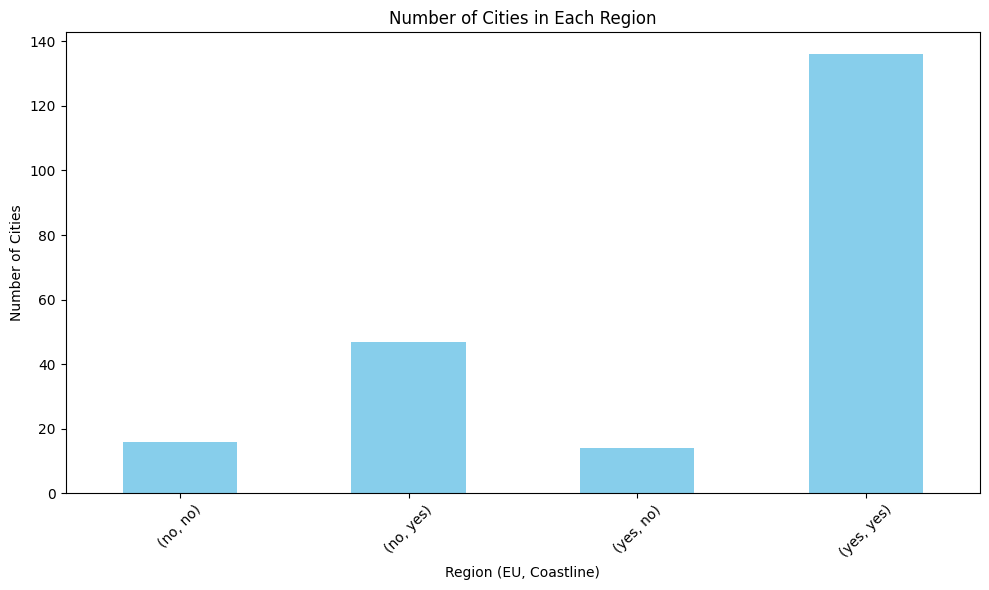

In [15]:
# plotting a bar chart
cities_by_region.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Number of Cities in Each Region')
plt.xlabel('Region (EU, Coastline)')
plt.ylabel('Number of Cities')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Part 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

countries = data['country'].unique()
num_countries = len(countries)

cmap = plt.get_cmap('nipy_spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 37)]

plt.figure(figsize=(10, 6))

for i, country in enumerate(countries):
    subset = data[data['country'] == country]
    plt.scatter(
        subset['longitude'],
        subset['latitude'],
        label=country,
        color=colors[i % 37], 
        s=40
    )

plt.title('City Locations by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize='small')
plt.tight_layout()
plt.show()

#### Part 3

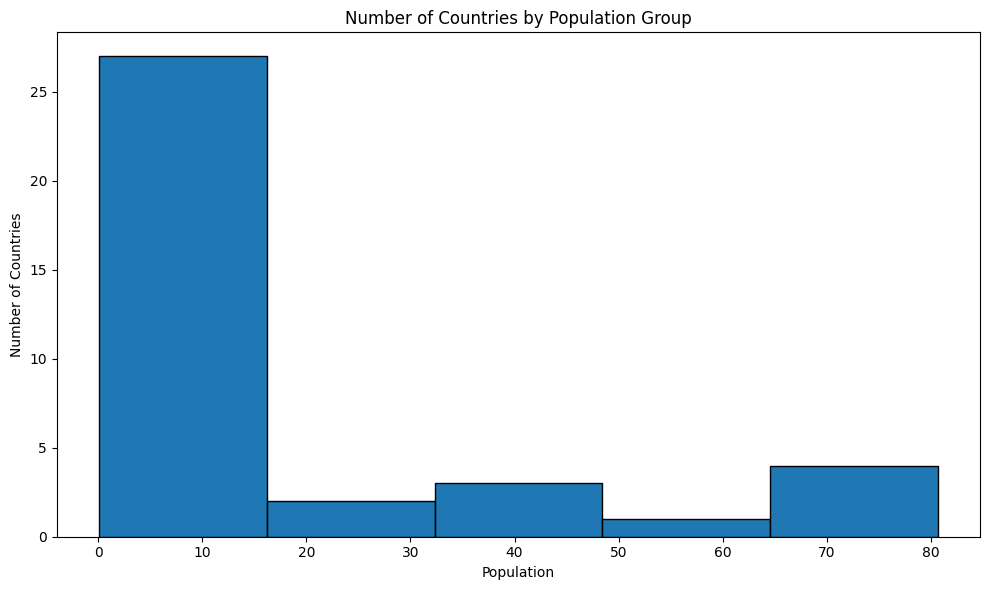

In [17]:
unique_countries = data.drop_duplicates(subset='country')

num_bins = 5

counts, bin_edges = np.histogram(unique_countries['population'], bins=num_bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

plt.figure(figsize=(10, 6))
plt.bar(bin_centers, counts, width=np.diff(bin_edges), edgecolor='black', align='center')

plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.title('Number of Countries by Population Group')

plt.tight_layout()
plt.show()

#### Part 4

In [ ]:
data['region'] = data['EU'] + ' & ' + data['coastline']

region_types = data['region'].unique()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, region in enumerate(region_types):
    ax = axes[i]

    eu_val, coast_val = region.split(' & ')

    region_df = data[data['region'] == region].reset_index(drop=True)
    n = len(region_df)
    xticks = list(range(len(region_df)))

    colors = region_df['temperature'].apply(
        lambda temp: 'red' if temp > 10 else 'blue' if temp < 6 else 'orange'
    )

    ax.scatter(xticks, region_df['latitude'], c=colors)
    ax.set_title(f"EU: {eu_val}, Coastline: {coast_val}")
    ax.set_xlabel("City Index")
    ax.set_ylabel("Latitude")
    
    if eu_val == 'yes' and coast_val == 'yes':
        ticks = list(range(0, n, 5))
    elif eu_val == 'no' and coast_val == 'yes':
        ticks = list(range(0, n, 5))
    else:
        ticks = xticks

    ax.set_xticks(ticks)
    ax.set_xticklabels([str(t) for t in ticks], rotation=45)

plt.tight_layout()
plt.show()